# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter = ';') # leemos el archivo "instacart_orders"
products = pd.read_csv('/datasets/products.csv', delimiter = ';') # leemos el archivo "products"
aisles = pd.read_csv('/datasets/aisles.csv', delimiter = ';') # leemos el archivo "aisles"
departments = pd.read_csv('/datasets/departments.csv', delimiter = ';') # leemos el archivo "departments"
order_products = pd.read_csv('/datasets/order_products.csv', delimiter = ';') # leemos el archivo "order_products"

In [3]:
# mostrar información del DataFrame "orders"
print(orders.head())
print(" ")
print(orders.info())

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-n

In [4]:
# mostrar información del DataFrame "products"
print(products.head())
print(" ")
print(products.info())

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

In [5]:
# mostrar información del DataFrame "aisles"
print(aisles.head())
print(" ")
print(aisles.info())

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


In [6]:
# mostrar información del DataFrame "departments"
print(departments.head())
print(" ")
print(departments.info())

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


In [7]:
# mostrar información del DataFrame "order_products"
print(order_products.head())
print(" ")
print(order_products.info())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
En primera instancia, podemos ver que tenemos 5 archivos diferentes, donde cada uno muestra información relevante sobre ciertos aspectos de los datos de InstaCart. Metiendonos un poco más a la composición y a los tipos de datos de cada archivos, nos podemos dar cuenta que la gran parte de las columnas son int o float, aunque también podemos llegar a observar columnas de tipo object. Pasando a los datos nulos y posibles duplicados, podemos ver que en dos archivos existen datos nulos y para corroborar si hay valores duplicados deberemos hacer los cálculos pertinentes. Además, veo que los nombres de las columnas siguen los principios de redacción y son fáciles de entender. Considero que esos son los puntos a destacar de esta primer fase de descripción de los datos.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
Para esta segunda etapa del análisis, que consiste en el preprocesamiento de datos, mi plan de acción sería primero encontrar y eliminar los valores duplicados que llegasen a haber en los diferentes archivos. Después pasaré a analizar los posibles datos ausentes que se presenten en los archivos. Para ello primero determinaré cuántos valores ausentes hay en cada archivo para poder determinar que herramientas de manipulación (eliminar, sustituir, reemplazar, etc.) que sean las mejores para cada archivo y columnas. Por último considero que la parte del porque hice esto o aquello es de suma importancia poner para que la audiencia sepa y siga mi razonamiento lógico.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
duplicatesOrders = orders.duplicated().sum() # Determinamos cuántas filas están duplicadas
print(duplicatesOrders)

15


In [9]:
dupOrders = orders[orders.duplicated(keep=False)] # Mostramos que filas están duplicadas para ver que tienen en común
print(dupOrders)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
30371    1918001   188546            14          3                  2   
99462     794638    50898            24          3                  2   
119251    408114    68324             4          3                  2   
142258   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
164581   1112182   202304            84          3                  2   
200059   1782114   106752             1          3                  2   
204042   2125197    14050            48          3                  2   
215294   2160484   107525            16          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
242618   1021560    53767             3          3                  2   
250626    467134    63189            21          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
En este archivo existen 15 líneas duplicadas, que lo que tienen en común es que todos los pedidos se hicieron el día "3" (miércoles) a las "2" de la mañana.

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
pedidos_mier_2am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print(pedidos_mier_2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
Eñ hecho de que las líneas duplicadas tengan como factor comunes el miércoles (3) a las 2 de la mañana me dice que a lo mejor el sistema a esa horas sufrió de imperfecciones y todas las compras las estuvo marcando dos veces, aspecto que puede sesgar nuestros datos y referirnos a conclusiones posiblemente erroneas.

In [11]:
# Elimina los pedidos duplicados
orders.drop_duplicates(inplace=True)

In [12]:
# Vuelve a verificar si hay filas duplicadas
duplicatesOrders = orders.duplicated().sum() # Corroboramos que ya se eliminaron los valores duplicados
print(duplicatesOrders)

0


In [13]:
dupOrders = orders[orders.duplicated(keep=False)] # Mostramos que filas están duplicadas y nos damos cuenta que ya no hay ninguna
print(dupOrders)

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


In [14]:
# Vuelve a verificar si hay IDs duplicados de pedidos
duplicatesOrder = orders['order_id'].duplicated().sum() # Corroboramos que no hay valores duplicados en ID Orders
print(duplicatesOrder)
duplicatesUser = orders['order_id'].duplicated().sum() # Corroboramos que no hay valores duplicados en ID Users
print(duplicatesUser)

0
0


Describe brevemente tus hallazgos y lo que hiciste con ellos
Al inicio del análisis lo primero que hice fue ver cuántas filas duplicadas había y para mi sorpresa me encontré con 15 duplicados. Analizando el porque de ellos, me di cuenta que todos se habían dado el día "3" (miércoles) a las 2 am, por lo que asumí que pudo ser error del sistema en ese día a esa hora. Como ya tenía este entendido, procedí a eliminarlos porque ya había corroborado que en efecto eran datos duplicados, proveninientes de posibles fallas en el sistema de recopilación de datos. Al eliminarlos, volví a corroborar que ya no hubiera datos duplicados y así fue. Ahora este archivo ya no tiene datos duplicados.

### `products` data frame

In [15]:
# Verifica si hay filas totalmente duplicadas
duplicatesProducts = products.duplicated().sum() # Determinamos cuántas filas están duplicadas
print(duplicatesProducts)

0


In [16]:
# Verifica si hay IDs duplicadas de productos
productID = products['product_id'].duplicated().sum() # Corroboramos si hay valores duplicados en ID Products
print(productID) 
aisleID = products['aisle_id'].duplicated().sum() # Corroboramos si hay valores duplicados en ID Aisles
print(aisleID)

# Nos damos cuenta que no hay duplicados en productID pero si en aisleID

0
49560


In [17]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [18]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name_upper'] = products['product_name'].str.upper()
products['product_name_upper']

# Se muestra la columna creada "´product_name_upper", donde se ve que todos los nombres están en mayúsuclas

0                               CHOCOLATE SANDWICH COOKIES
1                                         ALL-SEASONS SALT
2                     ROBUST GOLDEN UNSWEETENED OOLONG TEA
3        SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4                                GREEN CHILE ANYTIME SAUCE
                               ...                        
49689                        HIGH PERFORMANCE ENERGY DRINK
49690                        ORIGINAL PANCAKE & WAFFLE MIX
49691      ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
49692                               SPRING WATER BODY WASH
49693                              BURRITO- STEAK & CHEESE
Name: product_name_upper, Length: 49694, dtype: object

In [19]:
# Revisa si hay nombres duplicados de productos no faltantes

dupProductName = products[(~products['product_name'].isna()) & products['product_name_upper'].duplicated()]

# Imprimir el número total de productos duplicados no nulos
print(dupProductName.shape[0]) 


104


El análisis realizado en el código muestra una verificación exhaustiva de posibles duplicados en el conjunto de datos de productos. Se comprueba si hay filas completamente duplicadas, IDs duplicadas en las columnas product_id y aisle_id, así como nombres duplicados de productos, normalizando los nombres a mayúsculas para evitar diferencias en el formato. Además, se identifican los nombres de productos duplicados que no están ausentes (no nulos). Este enfoque garantiza una limpieza de datos más robusta, detectando inconsistencias que podrían afectar la calidad del análisis posterior.

### `departments` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
duplicatesDepartments = departments.duplicated().sum() # Determinamos cuántas filas están duplicadas
print(duplicatesDepartments)

# No hay valores duplicados en este archivo

0


In [21]:
# Revisa si hay IDs duplicadas de productos
departmentID = departments['department_id'].duplicated().sum()
print(departmentID)

# No hay valores duplicados en la columna de departmentID

0


En este archivo de "departments" pudimos darnos cuenta que no hay filas duplicadas y que los departmentsID son totalmente únicos. Revisando el análisis, me di cuenta que este archivo solo contiene 21 filas únicas con la información de los departamentos.

### `aisles` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
duplicatesAisles = aisles.duplicated().sum() # Determinamos cuántas filas están duplicadas
print(duplicatesAisles)

# No hay valores duplicados en este archivo

0


In [23]:
# Revisa si hay IDs duplicadas de productos
aislesID = aisles['aisle_id'].duplicated().sum()
print(aislesID)

# No hay valores duplicados en la columna de aislesID

0


Al igual que en el archivo de "departments" en este archivo de "aisles" pudimos darnos cuenta que no hay filas duplicadas y que los aislesID son totalmente únicos. Revisando el análisis, me di cuenta que este archivo solo contiene 134 filas únicas con la información de los aisles.

### `order_products` data frame

In [24]:
# Revisa si hay filas totalmente duplicadas
duplicatesOrderProducts = order_products.duplicated().sum() # Determinamos cuántas filas están duplicadas
print(duplicatesOrderProducts)

# No hay valores duplicados en este archivo

0


In [25]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
orderID = order_products['order_id'].duplicated().sum()
print(orderID)
productID = order_products['product_id'].duplicated().sum()
print(productID)

# Sí hay demasiados valores duplicados en este archivo, principalmente en las dos columnas de ID's del archivo

4094961
4499434


In [26]:
# Elimina los pedidos duplicados
order_products.drop_duplicates(inplace=True)

In [27]:
orderID = order_products['order_id'].duplicated().sum()
print(orderID)
productID = order_products['product_id'].duplicated().sum()
print(productID)

4094961
4499434


En este archivo lo que me di cuenta es que no hubo filas duplicadas, pero si hubieron tanto orderID´s como productID's repetidos o duplicados. Al intentar eliminar estos valores duplicados, no pude hacerlo porque por ejemplo solo el orderID o productID estaban duplicados, no toda la fila como tal. De esta manera, no se pudo eliminar los valores duplicados de esas columnas, por lo que nos quedamos con la BD original.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [28]:
# Encuentra los valores ausentes en la columna 'product_name'
products_na = products['product_name'].isna().sum()
print(products_na)

1258


Para el archivo de "products" en la columna "product_name" podemos ver que hay 1,258 valores nulos. A lo mejor y esto se deba a un error en el sistema o simplemente porque al usuario se le olvidó poner el nombre del producto en su compra

In [29]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
# Creamos un df con los valores ausentes en la columna "product_name"
product_names_na = products[products['product_name'].isna()] 

# Verificamos si todas las filas con nombre de producto ausente tienen AisleID igual a 100
relacionado_pasillo_100 = (product_names_na['aisle_id'] == 100).all()

# Imprimimos is en efecto es así o no
if relacionado_pasillo_100:
    print("Todos los productos ausentes están relacionados con el pasillo con ID 100.")
else:
    print("No todos los productos ausentes están relacionados con el pasillo con ID 100.")

Todos los productos ausentes están relacionados con el pasillo con ID 100.


Al realizar el análisis nos dimos cuenta que en efecto, todos los productos ausentes están relacionados con el pasillo ID 100. Esto nos da a entender que pudo haber fallas en la fuente de datos, una falta de limpieza o simplemente pueda ser una pasillo especial dentro de la empresa.

In [30]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# Creamos un df con los valores ausentes en la columna "product_name"
product_names_na = products[products['product_name'].isna()] 

# Verificamos si todas las filas con nombre de producto ausente tienen AisleID igual a 100
relacionado_departamento_21 = (product_names_na['department_id'] == 21).all()

# Imprimimos is en efecto es así o no
if relacionado_departamento_21:
    print("Todos los productos ausentes están relacionados con el departamento con ID 21.")
else:
    print("No todos los productos ausentes están relacionados con el departamento con ID 21.")

Todos los productos ausentes están relacionados con el departamento con ID 21.


Al realizar el análisis nos dimos cuenta que en efecto, todos los productos ausentes están relacionados con el departemento ID 21. Esto nos da a entender que pudo haber fallas en la fuente de datos, una falta de limpieza o simplemente pueda ser un departamento especial dentro de la empresa.

In [31]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = products[products['aisle_id'] == 100] # Filtramos el DF para sacar los datos con aisle_id = 100
department_21 = products[products['department_id'] == 21] # Filtramos el DF para sacar los datos con department_id = 21

print("AisleID == 100")
print(aisle_100)
print(" ")
print("DepartmentID == 21")
print(department_21)

AisleID == 100
       product_id product_name  aisle_id  department_id product_name_upper
37             38          NaN       100             21                NaN
71             72          NaN       100             21                NaN
109           110          NaN       100             21                NaN
296           297          NaN       100             21                NaN
416           417          NaN       100             21                NaN
...           ...          ...       ...            ...                ...
49552       49553          NaN       100             21                NaN
49574       49575          NaN       100             21                NaN
49640       49641          NaN       100             21                NaN
49663       49664          NaN       100             21                NaN
49668       49669          NaN       100             21                NaN

[1258 rows x 5 columns]
 
DepartmentID == 21
       product_id product_name  aisle_i

Viendo los dos DF nos podemos dar cuenta que ambos en la columna "product_name" muestran el valor "NaN", por lo que entendemos que para el aisle 100 y department 21 no existen nombres de productos. Volvemos a lo mismo, esto se puede deber a fallas en la fuente de datos, una falta de limpieza o simplemente pueda ser un pasillo o departamento especial dentro de la empresa

In [32]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')

products_na = products['product_name'].isna().sum() # corroboré que ya nu hubieran NaN's en la columna "product_name"
print(products_na)

0


In [33]:
value_counts = products['product_name'].value_counts() # Conté los valores de cada elemento de la columna para determinar si los valores "NaN" fueron cambiados a "Unknown" con éxito y así fue.
print(value_counts)

Unknown                                                                        1258
Apple Junifer                                                                     1
Black Raspberry/Cherry Limeade/Orange Mango/Kiwi Strawberry Sparkling Water       1
Whole Golden Zahidi Dates                                                         1
Strawberry Banana Coconut Milk Yogurt                                             1
                                                                               ... 
Water Capsules- Extended Relief                                                   1
Crushed Rosemary                                                                  1
New England Clam Chowder Condensed Soup                                           1
Sliced Wheat Bread                                                                1
Chocolate Almond Bar                                                              1
Name: product_name, Length: 48437, dtype: int64


Del ejercicio pasado ya sabíamos que había valores NaN en el departamento 21 y en el asile 100, por lo que procedí a reemplazar esos valores NaN,s por la palabra "Unknown". Como se muestra arriba, este cambio se logró con éxito debido a que ahora el valor de los 1,258 valores NaN´s ahora es "Unknown" como lo habíamos plantado desde un inicio.

### `orders` data frame

In [34]:
# Encuentra los valores ausentes
orders_na = orders.isna().sum()
print(orders_na)

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [35]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
# No

Al visualizar los valores ausentes en este archivo, me di cuenta que los únicos valores que se mostraban como austentes eran en la columna de "days_since_prior_order, lo cuál tiene sentido porque puede haber clientes nuevos que no tienen esta campo lleno. Que en este archivo no haya valores austentes nos habla que en términos de valores austenes, no tiene. lo cual es bueno porque no tenemoso que manipularlos o reemplazarlos.

### `order_products` data frame

In [36]:
# Encuentra los valores ausentes
order_products_na = order_products.isna().sum()
print(order_products_na)

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [37]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
max_add_to_cart = min(order_products['add_to_cart_order'])
min_add_to_cart = max(order_products['add_to_cart_order'])

print(max_add_to_cart)
print(min_add_to_cart)

1.0
64.0


Después del análisis realizado, pudimos encontrar que los únicos valores ausentes están en la columna "add_to_cart_order". Sabemos igualmente que el valor mínimo de esta columna es 1 mientras que el valor máximo es de 64, lo cual no dice que el rango en esta columna es considerable.

In [38]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

# Guardamos los valores nulos de la columna en la variable "orders_with_na"
orders_with_na = order_products[order_products['add_to_cart_order'].isna()]

# Obtenemos los IDs de pedidos correspondientes
add_to_cart_order = orders_with_na['order_id']

print(add_to_cart_order)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
product_counts = orders_with_na.groupby('order_id')['product_id'].count()

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
min_count = product_counts.min()

# Verificar si todos los pedidos tienen más de 64 productos
all_have_more_than_64 = min_count > 64

print("Valor mínimo del conteo de productos en pedidos con valores ausentes:", min_count)
print("¿Todos los pedidos con valores ausentes tienen más de 64 productos?", all_have_more_than_64)

Valor mínimo del conteo de productos en pedidos con valores ausentes: 1
¿Todos los pedidos con valores ausentes tienen más de 64 productos? False


En esta etapa del proyecto, lo que hicimos fue reemplazar los valores nulos que tenía la columna "add_to_cart_order" por el order_id y así ver que order_id no tenía este campo lleno. Aunado a esto, igualmente contestamos a la pregunta de si ¿Todos los pedidos con valores ausentes tienen más de 64 productos? Para esto lo que encontramos fue que no, no todos los pedidos con valores austentes tenían más de 64 productos. Encontramos igualmente que le valor mínimo del conteo de productos en pedidos con valores ausentes era 1 producto. Esto nos corrobora lo que sacamos más arriba, donde el mínimo y máximo de la columna "add_to_cart_order" es 1 y 64 respectivamente.


In [40]:
# Remplaza los valores ausentes en la columna 'add_to_cart" con 999
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)

# y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)

In [41]:
# Corroboramos ambos cambios
order_products_na = order_products['add_to_cart_order'].isna().sum()
print(f"Tenemos {order_products_na} datos nulos después del cambio.")
print(" ")
print(order_products.info())

Tenemos 0 datos nulos después del cambio.
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 173.4 MB
None


Siguiendo con los datos nulos que se encontraron anteriormente en la columna "add_to_cart_order", lo que procedía era reemplazarlos con otro valor para ya no tener datos nulos. Se acordó que el dato a reemplazar los valores nulos fuera el 999, y así se hizo. Después se procedió a corroborar si ya no había datos nulos y en efecto fue así.
Por otro lado, ya que se tenía cada elemento de esta columna en valor numérico (con el cambio de datos NaN a 999), se procedió a cambiar el tipo de dato de esa colmna a int64, debido a que todos sus elementos eran valores numéricos. En la parte de arriba se puede ver que este cambio se hizo de forma exitosa.

## Conclusiones

La limpieza exhaustiva que hemos realizado previamente no solo mejora la calidad de nuestros datos, sino que también nos proporciona una base sólida para realizar análisis más profundos y tomar decisiones más informadas. Este proceso ha demostrado ser esencial para asegurar que nuestro trabajo futuro se base en datos fiables y representativos. Con estos datos limpios y bien gestionados, estamos mejor preparados para enfrentar nuevos desafíos y continuar avanzando con confianza en el proyecto.


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [42]:
orders_hour = orders['order_hour_of_day']
orders_dow = orders['order_dow']

In [43]:
print("Valor mínimo de la columna 'order_hour_of_day': ", orders_hour.min())
print("Valor máximo de la columna 'order_hour_of_day': ", orders_hour.max())
print("Valor mínimo de la columna 'order_dow': ", orders_dow.min())
print("Valor máximo de la columna 'order_dow': ", orders_dow.max())

Valor mínimo de la columna 'order_hour_of_day':  0
Valor máximo de la columna 'order_hour_of_day':  23
Valor mínimo de la columna 'order_dow':  0
Valor máximo de la columna 'order_dow':  6


Para poder determinar el rango de los valores en ambas columnas, tenía que encontrar el valor mínimo y máximo de cada columna. Para ello, guardé cada columna en una variable diferente y procedí a imprimir el valor mínimo y máximo de cada columna. Viendo los resultados, me pude dar cuenta que en efecto la columna "order_hour_of_day" oscila entre 0 y 23 mientras que la columna "order_dow" oscila entre 0 y 6.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

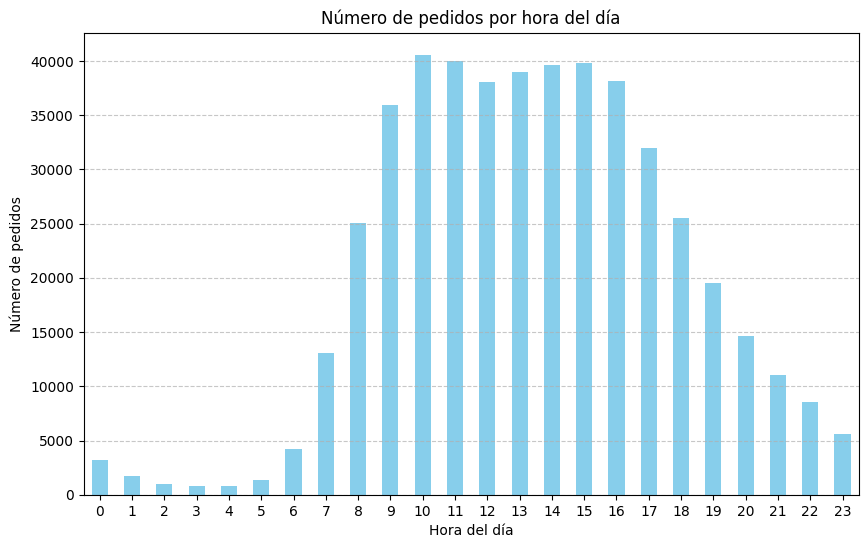

In [44]:
# Primero sumamos y ordenamos las ordenes por día
ordenes_por_dia = orders['order_hour_of_day'].value_counts().sort_index()

# Creamos el gráfico
plt.figure(figsize=(10, 6))
ordenes_por_dia.plot(kind='bar', color='skyblue')
plt.title('Número de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)  # Mantenemos las etiquetas del eje x horizontales
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.show()

Viendo el gráfico, podemos ver que el número de pedidos entre las 12am y 7am son menores, mientras que en las horas 9am a 4pm el número de pedidos aumenta considerablemente, superando los 35,000 pedidos por hora. Además, la tendencia baja aún entre las horas de 5pm a las 11pm con pedidos de entre 5,000 y 20,000 a la hora. Esto nos dice que la demanda del negocio se concentra principalmente entre las 9am y las 4pm.

### [A3] ¿Qué día de la semana compran víveres las personas?

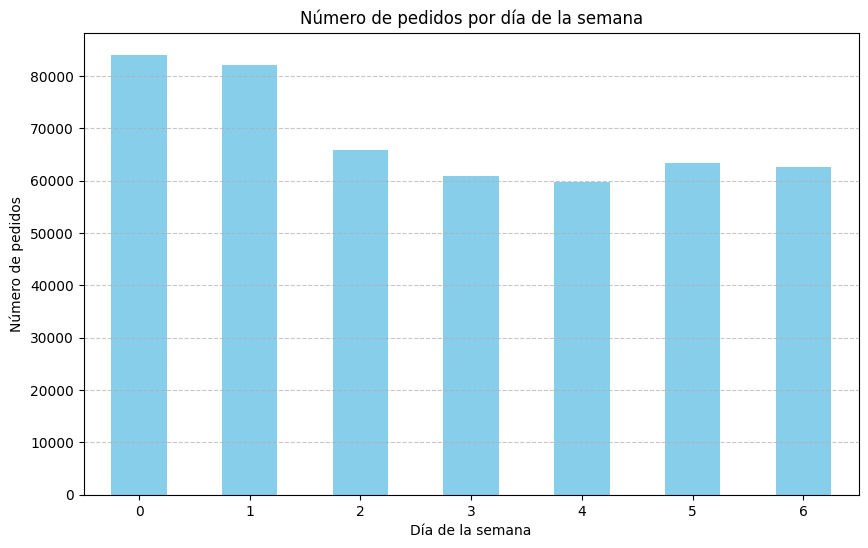

In [45]:
# Primero sumamos y ordenamos las ordenes por día de la semana
ordenes_por_dia_semana = orders['order_dow'].value_counts().sort_index()

# Creamos el gráfico
plt.figure(figsize=(10, 6))
ordenes_por_dia_semana.plot(kind='bar', color='skyblue')
plt.title('Número de pedidos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)  # Mantenemos las etiquetas del eje x horizontales
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.show()

Viendo el gráfico, podemos ver que el número de pedidos entre martes y sábado se mantiene practicamente igual, rondando los 60,000 pedidos por día. La alta demanda se ve reflejada especificamente en el día Domingo y Lunes, teniendo pedidos al día superiores a los 80,000. Esto nos dice que las personas realizan más pedidos esos días que el resto de la semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

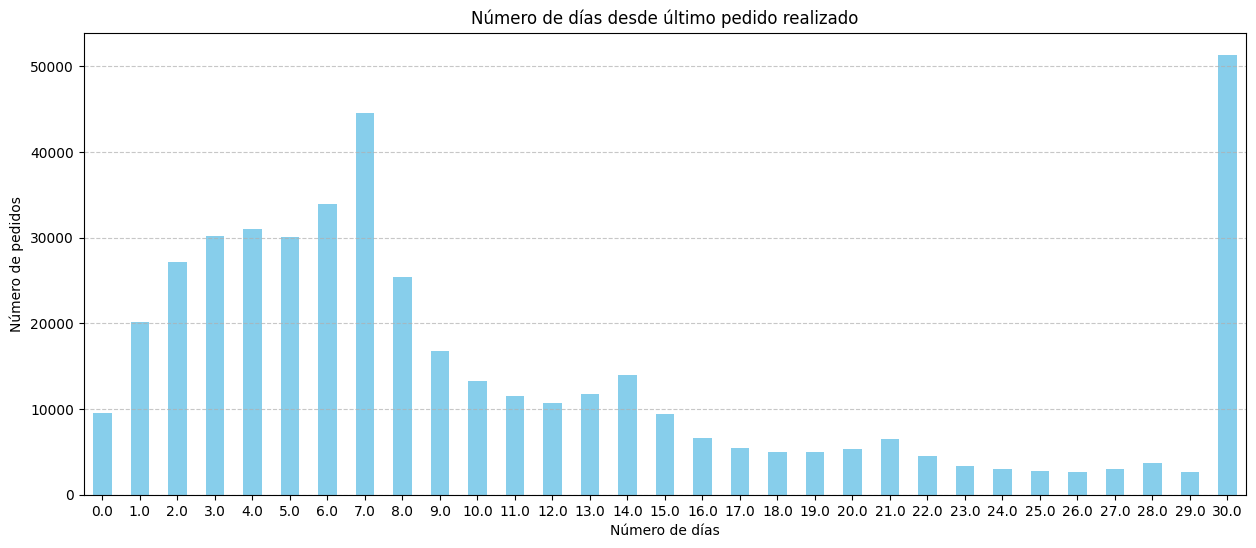

In [46]:
# Primero sumamos y ordenamos los días desde su último pedido
dias_desde_ultimo_pedido = orders['days_since_prior_order'].value_counts().sort_index()

# Creamos el gráfico
plt.figure(figsize=(15, 6))
dias_desde_ultimo_pedido.plot(kind='bar', color='skyblue')
plt.title('Número de días desde último pedido realizado')
plt.xlabel('Número de días')
plt.ylabel('Número de pedidos')
plt.xticks(rotation=0)  # Mantenemos las etiquetas del eje x horizontales
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.show()

Viendo el gráfico, podemos ver que las personas tardan no más de 1 semana en hacer su siguiente pedido, esto debido a que las columnas entre los 0 y 7 días están de cierto modo saturadas de pedidos. Por otro lado y sorprendentemente, la mayor parte de las personas esperan alrededor de 1 mes (30 días) en volver a hacer su pedido en la empresa. Esto es verdaderamente impresionante porque entre los días 8 - 29 los clientes de verdad no hacen de nuevo sus pedidos, sino que se esperan al mes cumplido o lo hacen en los días siguientes a su último pedido. Esto no da a entender que hay gente que regularmente usa este servicio o que de plano solo lo piden una vez al mes.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [47]:
# Primero filtramos los datos para miércoles y sábados
ordenes_miercoles = orders[orders['order_dow'] == 3]
ordenes_sabado = orders[orders['order_dow'] == 5]

In [48]:
# Contamos los pedidos por hora del día para ambos días
cuenta_ordenes_miercoles = ordenes_miercoles['order_hour_of_day'].value_counts().sort_index()
cuenta_ordenes_sabado = ordenes_sabado['order_hour_of_day'].value_counts().sort_index()

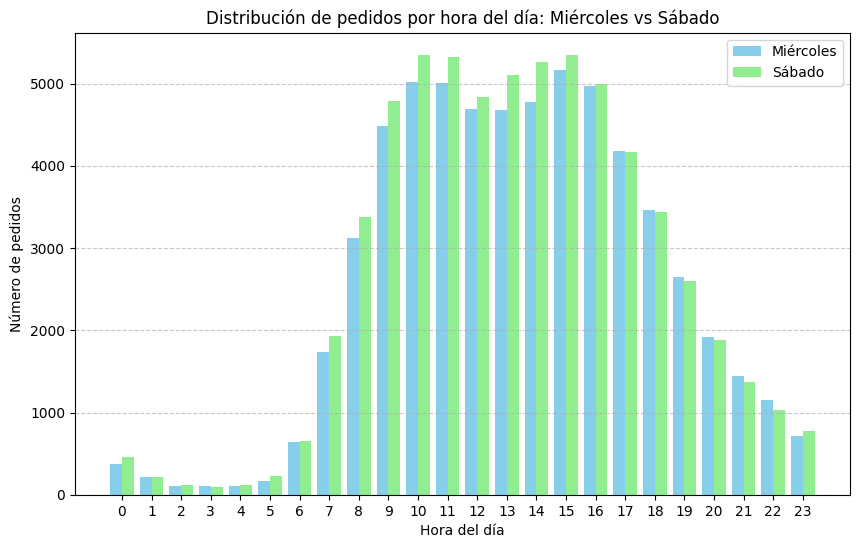

In [49]:
# Creamos los gráfico de barras para ambos días
plt.figure(figsize=(10, 6))
plt.bar(cuenta_ordenes_miercoles.index - 0.2, cuenta_ordenes_miercoles.values, width=0.4, label='Miércoles', color='skyblue')
plt.bar(cuenta_ordenes_sabado.index + 0.2, cuenta_ordenes_sabado.values, width=0.4, label='Sábado', color='lightgreen')

# Configurar el gráfico
plt.title('Distribución de pedidos por hora del día: Miércoles vs Sábado')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(range(24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.show()

Viendo la gráfica de arriba, podemos observar que las diferencias entre los pedidos en miércoles y sábado son practicamente iguales, de verdad solo hay diferencias mínimas entre el comportamiento de ambos días. Se tienen las mismas horas con mayor demanda y las mismas horas con menor demanda. Lo que si pude ver es que en general los pedidos en sábado son ligeramente superiores a los del miércoles, pero por lo mínimo.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [50]:
# Grafica la distribución para el número de órdenes que hacen los clientes 
# (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
# Contar cuántos pedidos ha hecho cada cliente
ordenes_por_cliente = orders['user_id'].value_counts()

# Contar cuántos clientes han realizado 1 pedido, 2 pedidos, 3 pedidos, etc.
distribucion_ordenes = ordenes_por_cliente.value_counts().sort_index()



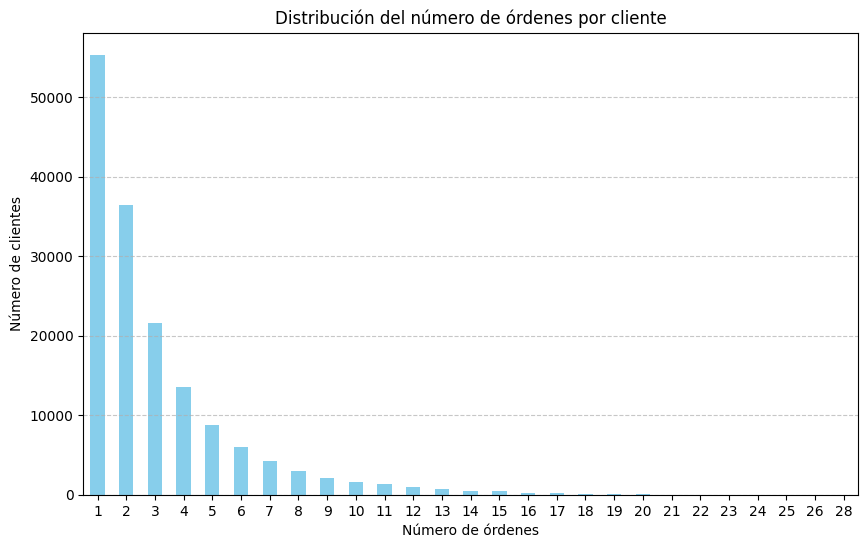

In [51]:
# Creamos el gráfico
plt.figure(figsize=(10, 6))
distribucion_ordenes.plot(kind='bar', color='skyblue')

plt.title('Distribución del número de órdenes por cliente')
plt.xlabel('Número de órdenes')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostramos el gráfico
plt.show()

Viendo el gráfico de arriba, pude notar una tendencia a la baja; es decir, mientras los número de pedidos aumentaban, menor cantidad de clientes hacían esa cantidad de pedidos. Como se puede ver, la gran parte de los clientes hicieron 1 0 2 pedidos, una menor cantidad de personas hicieron de 3 - 4 pedidos y ya de los 5 pedidos en adelante, menos de 10,000 e incluso menos de 1,00o0 personas hicieron esa cantidad de pedidos. En conclusión, los usuarios de esta empresa generalmente hacen de 1 - 4 pedidos, rara vez van a llegar a hacer 5+ pedidos.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [52]:
# Para poder hacer esto, primero debemos unir los DataFrames 'order_products' con 'products' usando 'product_id'
df_unido = pd.merge(order_products, products, on='product_id')

# Contamos cuántas veces se ha pedido cada producto
cuenta_de_producto = df_unido.groupby(['product_id', 'product_name']).size().reset_index(name='count')

# Ordenamos los productos por la cantidad de veces que se han pedido, en orden descendente
top_20_productos = cuenta_de_producto.sort_values(by='count', ascending=False).head(20)

# Mostramos los 20 principales productos
print(top_20_productos)

       product_id              product_name  count
22808       24852                    Banana  66050
12025       13176    Bag of Organic Bananas  53297
19370       21137      Organic Strawberries  37039
20077       21903      Organic Baby Spinach  33971
43271       47209      Organic Hass Avocado  29773
43788       47766           Organic Avocado  24689
43663       47626               Large Lemon  21495
15364       16797              Strawberries  20018
24047       26209                     Limes  19690
25556       27845        Organic Whole Milk  19600
25666       27966       Organic Raspberries  19197
21025       22935      Organic Yellow Onion  15898
22908       24964            Organic Garlic  15292
41244       45007          Organic Zucchini  14584
35996       39275       Organic Blueberries  13879
45561       49683            Cucumber Kirby  13675
25889       28204        Organic Fuji Apple  12544
5375         5876             Organic Lemon  12232
7543         8277  Apple Honeyc

Viendo esta lista de los top 20 productos más vendidos, podemos ver que el producto estrella sin duda alguna son las bananas pereo algo curioso que puedo ver es que la mayor parte de estos productos son frutas y verduras. Esto nos dice que los usuarios están usando esta plataforma más que nada para pedir sus frutas y verduras. En este top 20 podemos ver frutas como bananas, fresas, manzanas. Algo importante de notar también es que la mayoría de los productos son orgánicos, lo que nos dice que además de que la gente compre frutas y verduras, estas personas igual están buscando frutas y verduras orgánicas, aspecto que puede ser útil para la empresa de saber y poder ir determinando su precio oferta/demanda.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

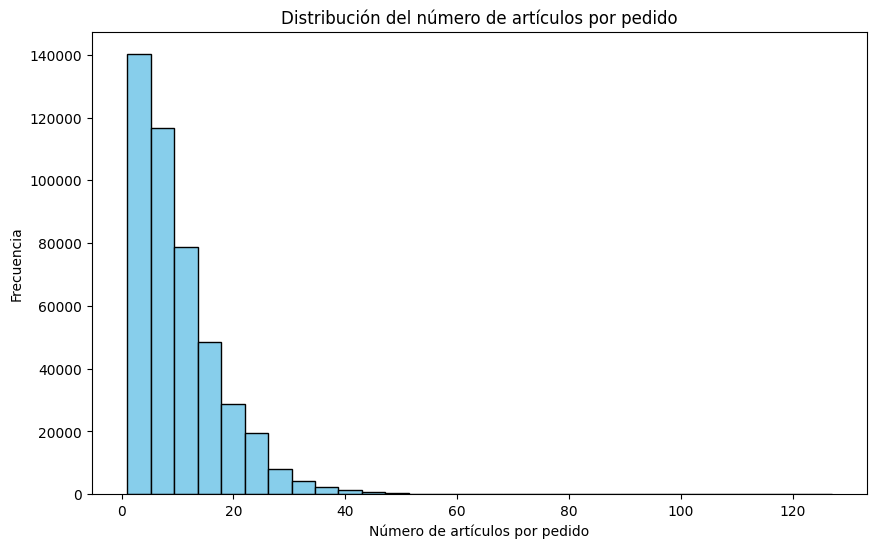

In [53]:
# Contamos cuántos productos hay en cada pedido
productos_por_orden = order_products.groupby('order_id').size()

# Graficamos la distribución
plt.figure(figsize=(10, 6))
plt.hist(productos_por_orden, bins=30, color='skyblue', edgecolor='black')

plt.title('Distribución del número de artículos por pedido')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')

# Mostramos el gráfico
plt.show()

Como podemos ver en el gráfico, el número de artículos por pedido definitivamente ronda entre los 1 - 5 artículos y ya con menor cantidad pero aún así una considerable, esta el rango entre los 6 - 20 artículos por pedido. Ya por arriba de los 20 artículos la verdad es que no existe cuenta significativa y más que nada se puede resumir a que hay 0 o cercano a 0 pedidos con más de 20 artículos. Este comportamiento le puede ser de utilidad a la empresa para determinar los artpiculos por pedido promedio y hacer alguna estrategia de marketing en cuanto a esto.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [54]:
# Primero filtramos solo los productos que han sido reordenados
productos_reordenados = order_products[order_products['reordered'] == 1]

# Contamos cuántas veces se ha reordenado cada producto
cuenta_de_reordenes = productos_reordenados.groupby('product_id').size().reset_index(name='count')

# Ordenamos por la cantidad de reordenes, en orden descendente
cuenta_de_reordenes = cuenta_de_reordenes.sort_values(by='count', ascending=False)

# Unimos con el DataFrame 'product' para obtener los nombres de los productos
top_productos_reordenados = pd.merge(products[['product_id', 'product_name']], cuenta_de_reordenes.head(20), on='product_id')

# Mostramos los 20 principales productos que más se vuelven a pedir
print(top_productos_reordenados)

    product_id              product_name  count
0         5876             Organic Lemon   8412
1         8277  Apple Honeycrisp Organic   8836
2        13176    Bag of Organic Bananas  44450
3        16797              Strawberries  13945
4        21137      Organic Strawberries  28639
5        21903      Organic Baby Spinach  26233
6        22935      Organic Yellow Onion  11145
7        24852                    Banana  55763
8        24964            Organic Garlic  10411
9        26209                     Limes  13327
10       27845        Organic Whole Milk  16251
11       27966       Organic Raspberries  14748
12       28204        Organic Fuji Apple   8989
13       39275       Organic Blueberries   8799
14       45007          Organic Zucchini  10076
15       47209      Organic Hass Avocado  23629
16       47626               Large Lemon  15044
17       47766           Organic Avocado  18743
18       49235       Organic Half & Half   8389
19       49683            Cucumber Kirby

A pesar de que las bananas y las fresas fueran los productos más demandados en el análisis anterior, en este análisis podemos ver que el limón orgánico y la manzana orgánica fueron los productos que más veces volvieron a pedir. Este análisis de los productos con mas reorden va en concordancia con los productos más vendidos, ya que en este análisis igualmente podemos ver que los productos mas reordenados son las frutas y verduras.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [55]:
# Contamos el número total de veces que cada producto se ha pedido
total_ordenes = order_products.groupby('product_id').size().reset_index(name='total_orders')

# Contamos el número de veces que cada producto ha sido reordenado
ordenes_reordenadas = order_products[order_products['reordered'] == 1].groupby('product_id').size().reset_index(name='reordered_count')

# Unimos los datos de total de pedidos y reordenes en un solo DataFrame
productos_reordenados = pd.merge(total_ordenes, ordenes_reordenadas, on='product_id', how='left')

# Reemplazamos valores NaN en 'reordered_count' con 0 (para los productos que no han sido reordenados)
productos_reordenados['reordered_count'].fillna(0, inplace=True)

# Calculamos la proporción de reordenes
productos_reordenados['reorder_ratio'] = productos_reordenados['reordered_count'] / productos_reordenados['total_orders']

# Unimos con el DataFrame 'product' para obtener los nombres de los productos
datos_productos = pd.merge(productos_reordenados, products[['product_id', 'product_name']], on='product_id')

# Mostramos los resultados
print(datos_productos[['product_id', 'product_name', 'total_orders', 'reordered_count', 'reorder_ratio']])

       product_id                                       product_name  \
0               1                         Chocolate Sandwich Cookies   
1               2                                   All-Seasons Salt   
2               3               Robust Golden Unsweetened Oolong Tea   
3               4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4               7                     Pure Coconut Water With Orange   
...           ...                                                ...   
45568       49690                      HIGH PERFORMANCE ENERGY DRINK   
45569       49691                      ORIGINAL PANCAKE & WAFFLE MIX   
45570       49692    ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR   
45571       49693                             SPRING WATER BODY WASH   
45572       49694                            BURRITO- STEAK & CHEESE   

       total_orders  reordered_count  reorder_ratio  
0               280            158.0       0.564286  
1                11        

Para saber cuál es la proporción de las veces que se pide y que se vuelve a pedir un producto, tuve que sacar las ordenes totales por producto, asi como el valor de las reordenes igual de cada producto. Ya con esto, una variable clave que decidí incluir es el ratio de reorden de cada producto, que te muestra que tanto se re ordena ese producto. Esta variable se sacó dividiendo la cuenta de reordenes entre el total de pedidos y por ejemplo el producto "HIGH PERFORMANCE ENERGY DRINK" tuvo un 80% de reorden a comparación por ejemplo del "BURRITO- STEAK & CHEESE", que solo tuvo el 33% de reorden. Estos datos se mostraron para cada producto y la verdad es un análisis muy completo que la empreasa debe tener en cuenta para determinar sus productos estrella y sus productos no tan demandados.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [56]:
# Primero unimos order_products con orders para tener acceso al 'user_id'
ordenes = pd.merge(order_products, orders[['order_id', 'user_id']], on='order_id')

# Contamos el total de productos que ha pedido cada cliente
productos_usuarios = ordenes.groupby('user_id').size().reset_index(name='total_products')

# Contamos cuántos de esos productos ya habían sido pedidos anteriormente
productos_reordenados = ordenes[ordenes['reordered'] == 1].groupby('user_id').size().reset_index(name='reordered_products')

# Unimos ambas cuentas (total productos y reordenados) en un solo DataFrame
reorden_productos = pd.merge(productos_usuarios, productos_reordenados, on='user_id', how='left')

# Reemplazamos los valores NaN en  con 0
reorden_productos['reordered_products'].fillna(0, inplace=True)

# Por último calculamos la proporción de productos reordenados respecto al total de productos
reorden_productos['reorder_ratio'] = reorden_productos['reordered_products'] / reorden_productos['total_products']

# Mostramos los resultados
print(reorden_productos[['user_id', 'total_products', 'reordered_products', 'reorder_ratio']])

        user_id  total_products  reordered_products  reorder_ratio
0             2              26                 1.0       0.038462
1             4               2                 0.0       0.000000
2             5              12                 8.0       0.666667
3             6               4                 0.0       0.000000
4             7              14                13.0       0.928571
...         ...             ...                 ...            ...
149621   206203              27                 6.0       0.222222
149622   206206              21                15.0       0.714286
149623   206207              46                41.0       0.891304
149624   206208             125                87.0       0.696000
149625   206209              25                 8.0       0.320000

[149626 rows x 4 columns]


Para cada cliente, determiné el total de productos que ha pedido, cuántos de esos productos ya había comprado anteriormente (reordenados) y la proporción de productos reordenados respecto al total.
Si la proporción es alta (por ejemplo, del 80%), significa que la mayoría de los productos que el cliente compra son productos que ya ha comprado antes, lo que indica un alto grado de recurrencia en sus compras.
Este análisis es útil para entender la lealtad de los clientes hacia ciertos productos.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [57]:
# Primero filtramos los productos que se agregaron primero al carrito
productos = order_products[order_products['add_to_cart_order'] == 1]

# Contamos la frecuencia de cada 'product_id'
top_productos = productos['product_id'].value_counts().reset_index()
top_productos.columns = ['product_id', 'count']

# Unimos con el DataFrame 'products' para obtener los nombres de los productos
top_first_added = pd.merge(top_productos, products[['product_id', 'product_name']], on='product_id', how='left')

# Mostramos los 20 principales productos que las personas suelen agregar primero al carrito
top_20_productos = top_first_added.head(20)
print(top_20_productos[['product_id', 'product_name', 'count']])

    product_id                 product_name  count
0        24852                       Banana  15562
1        13176       Bag of Organic Bananas  11026
2        27845           Organic Whole Milk   4363
3        21137         Organic Strawberries   3946
4        47209         Organic Hass Avocado   3390
5        21903         Organic Baby Spinach   3336
6        47766              Organic Avocado   3044
7        19660                 Spring Water   2336
8        16797                 Strawberries   2308
9        27966          Organic Raspberries   2024
10       44632   Sparkling Water Grapefruit   1914
11       49235          Organic Half & Half   1797
12       47626                  Large Lemon   1737
13         196                         Soda   1733
14       38689     Organic Reduced Fat Milk   1397
15       26209                        Limes   1370
16       12341                Hass Avocados   1340
17        5785  Organic Reduced Fat 2% Milk   1310
18       27086                 

Este análisis te muestra los productos más frecuentes que las personas agregan primero en sus carritos. Si ciertos productos como "Banana" o "Bag of Organic Bananas" aparecen con mucha frecuencia, podría sugerir que estos son productos esenciales o populares que los usuarios suelen comprar en cada pedido.

### Conclusion general del proyecto:

En este proyecto, hemos trabajado con cinco archivos de datos cruciales para comprender los patrones de compra de los clientes. La descripción exhaustiva de estos datos nos permitió identificar la estructura y el contenido de cada archivo, lo que facilitó el proceso de preprocesamiento. La limpieza de datos, que incluyó la eliminación de duplicados y el tratamiento de valores ausentes, es fundamental para garantizar la precisión y fiabilidad de los análisis. Al eliminar datos redundantes y corregir valores faltantes, aseguramos que nuestras conclusiones se basaran en información completa y precisa. Posteriormente, el análisis de los datos, a través de la generación de gráficos y tablas, nos proporcionó insights valiosos sobre el comportamiento de compra, como los productos más populares y los patrones de reordenamiento. Estos resultados no solo ayudan a entender mejor las preferencias de los clientes, sino que también ofrecen al dueño de los datos herramientas prácticas para tomar decisiones informadas y optimizar las estrategias de venta. 